<a href="https://colab.research.google.com/github/wangechi-wq/Hypothyroid-prediction/blob/main/Copy_of_hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question

## a) Specifying the Question

 Determining whether or not the patient's symptoms indicate that the patient has hypothyroid.

## b) Defining the Metric for Success

Creating and determining the model that will give the most accurate prediction for hypothyroid condition among the patients

## c) Understanding the context

Thyroid disease is a general term for a medical condition that keeps your thyroid from making the right amount of hormones. Your thyroid typically makes hormones that keep your body functioning normally. When the thyroid makes too much thyroid hormone, your body uses energy too quickly.
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients to help them improve healthcare services

## d) Recording the Experimental Design

The following are the experimental design i used for the successful completion of the  project:

1. Importing all the necessary libraries
2. Loading the dataset
3. Reading, cleaning the dataset Performing:
4. Exploratory Data Analysis
5. Decision Trees: Random Forests , Ada Boosted Trees , Gradient Boosted Trees
6. Support Vector Machines: Kernel = polynomial , linear , rbf


## e) Data Relevance

Source [link]

The Dataset has the following Columns Age, Sex, on_thyroxine, query_on_thyroxine, on_antithyroid_medicationthyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre, TSH_measured, TSH, T3_measured, T3, TT4_measured and TT4. This will help us determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# 2.Reading the Data

In [1]:
#importing our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC,LinearSVC

In [2]:
#loading data
hypo = pd.read_csv("http://bit.ly/hypothyroid_data")
#Previewing the top of the dataset
hypo.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


In [3]:
hypo['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

# 3.Checking the Data

In [4]:
hypo.shape

(3163, 26)

The dataset contains 3163 rows and 26 columns

In [5]:
#checking the datatypes
hypo.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

Some numerical columns will have to be rectified their data types such as 'age','TSH','T3','TT4','T4U','FTI'

In [6]:
# checking for null values
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [7]:
# converting the question marks to nan
hypo = hypo.replace('?', np.nan)
hypo.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

There quite a number of null values especially in the TBG column which will be sorted out during data cleaning

In [8]:
#checking for duplicates in the dataset
hypo.duplicated().sum()

77

There some 77 duplicates that should be dropped during data cleaning.

In [9]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        2717 non-null   object
 2   sex                        3090 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# 4.Data Cleaning

In [10]:
#dropping duplicates
hypo.drop_duplicates(subset = None, keep = 'first', inplace = True)
hypo.shape

(3086, 26)

In [11]:
#Rectifying some column data types
def func_null(A, cols):
  for i in cols:
    A[i] = pd.to_numeric(A[i], errors='coerce')
num_col=['age','TSH','T3','TT4','T4U','FTI']  

func_null(hypo, num_col)

hypo.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [13]:
# We fill the missing values in the sex column with the mode which is Female since it appears most
hypo.sex.fillna('F', inplace = True)
#The numerical columns we fill the missing values with the mean value
num_col=['age','TSH','T3','TT4','T4U','FTI']
for col in num_col:
  hypo[col].fillna(hypo[col].mean(), inplace = True)


In [14]:
# Then drop TBG_Measured and TBG columns since they have quite a high no. of missing valuea

hypo.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

In [15]:
# confirming if the nulls are dropped
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

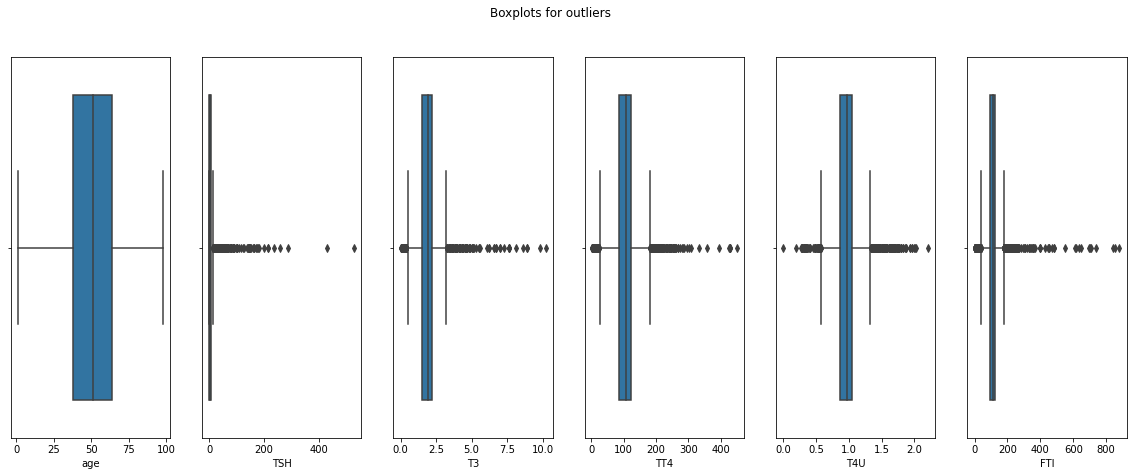

In [66]:
#checking for outliers
fig, ((ax1, ax2, ax3, ax4,ax5,ax6)) = plt.subplots(1,6, figsize=(20,7))
fig.suptitle('Boxplots for outliers')
sns.boxplot(hypo['age'], ax=ax1)
sns.boxplot(hypo['TSH'], ax=ax2)
sns.boxplot(hypo['T3'], ax=ax3)
sns.boxplot(hypo['TT4'], ax=ax4)
sns.boxplot(hypo['T4U'], ax=ax5)
sns.boxplot(hypo['FTI'], ax=ax6)
plt.show()

There outliers in the numerical columns apart from age column, but they will not be dropped since they are necessary for the analysis

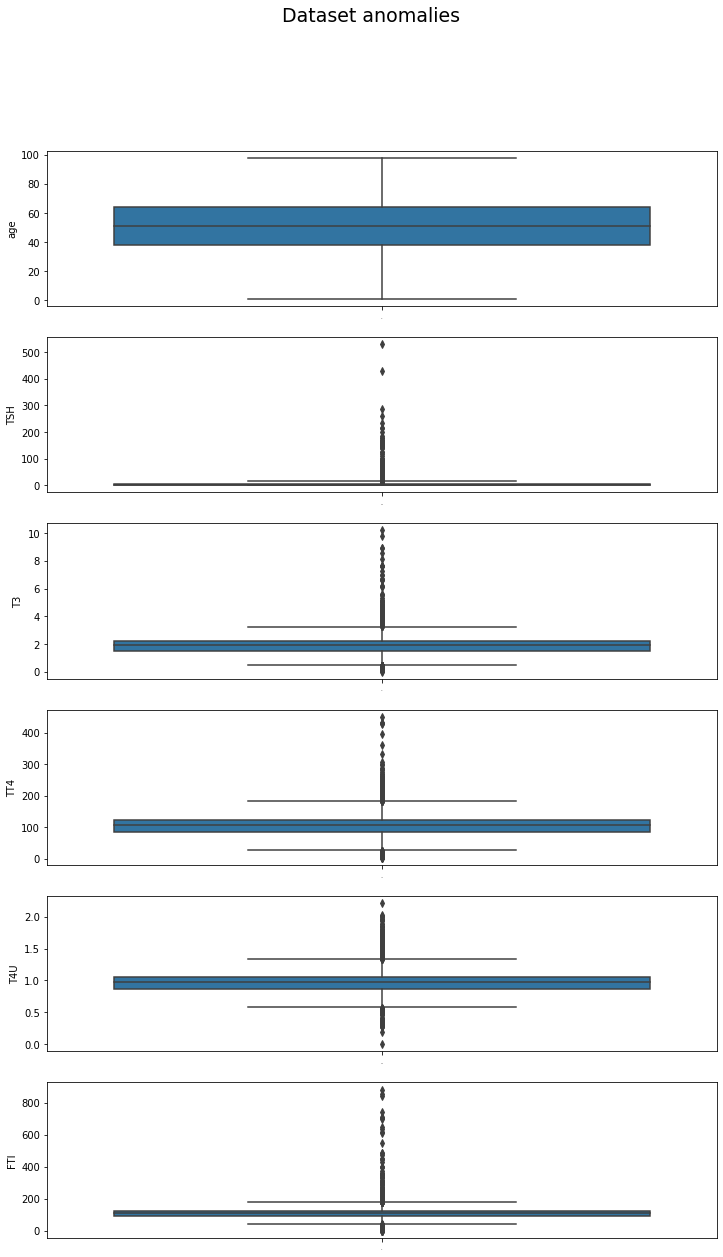

In [17]:
# checking for anomalies
anomalies = ['age','TSH','T3','TT4','T4U','FTI']
       
fig, ax = plt.subplots(len(anomalies), figsize=(12,20))

for i, col_val in enumerate(anomalies):

    sns.boxplot(y=hypo[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=1)
    plt.suptitle('Dataset anomalies', fontsize = 19)

# 5.Exploratory Data Analysis

## a) Univariate Analysis

In [18]:
#checking descriptive statistics of the dataset
hypo.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [19]:
# Finding the measures of central tendencies

for column in anomalies:
  print('\n')

  print(column + ', Variance: '+ str(hypo[column].var()))
  print(column + ', Skewness: '+ str(hypo[column].skew()))
  print(column + ', Kurtosis: '+ str(hypo[column].kurt()))



age, Variance: 318.78070137640805
age, Skewness: -0.18327889150126656
age, Kurtosis: -0.6214515094605133


TSH, Variance: 491.99650958899974
TSH, Skewness: 11.145456810806497
TSH, Kurtosis: 180.71322067683934


T3, Variance: 0.7479248192323144
T3, Skewness: 2.4537697771079516
T3, Kurtosis: 14.89106068829793


TT4, Variance: 1834.9632653603503
TT4, Skewness: 1.5284024697504315
TT4, Kurtosis: 7.679569618475355


T4U, Variance: 0.04703401422863151
T4U, Skewness: 0.9912889256133884
T4U, Kurtosis: 3.970968212445424


FTI, Variance: 3338.640107095551
FTI, Skewness: 5.425254880296113
FTI, Kurtosis: 52.799848473746245


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8691427d0>,
      dtype=object)

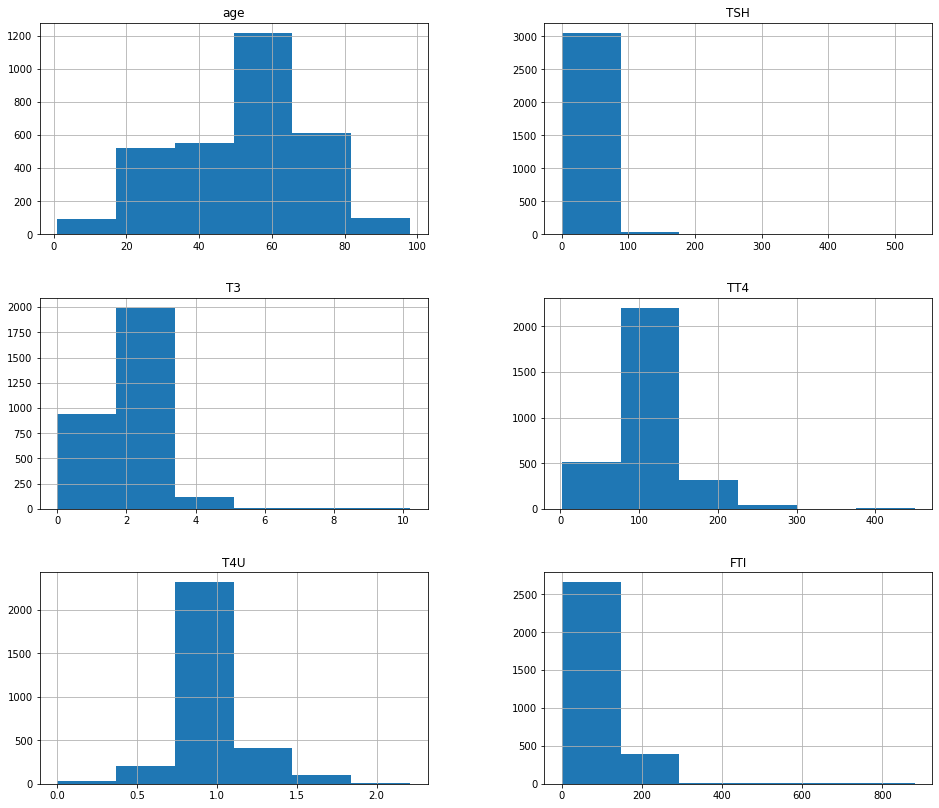

In [20]:
#Checking for the data if its normally distributed
hypo.hist(bins=6, figsize=[16,14])

The data is normally distributed

From the output, female are more than the male

Text(0.5, 1.0, 'Bargraph representing distribution of male and female ')

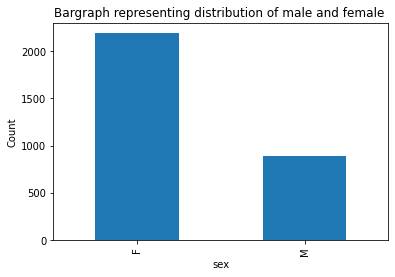

In [22]:
# Plotting the variable sex into a bar chart
hypo['sex'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("sex")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Bargraph representing distribution of male and female ")

From the output, those who are negative of hypothroid are the most

Text(0.5, 1.0, 'Pregnant vs status')

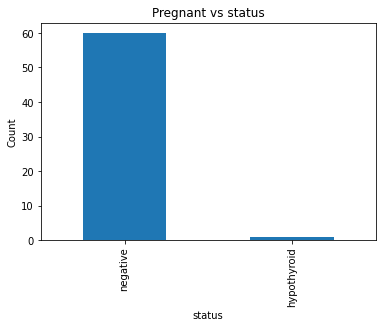

In [23]:
# distribution of status of the patients who are pregnant and those who are not.

# Pregnant 
# Plotting the variable status and pregnant into a bar chart
hypo[hypo['pregnant']=='t']['status'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("status")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Pregnant vs status")

Most pregnant people test negative in hypothyroid

Text(0.5, 1.0, 'not pregnant vs status')

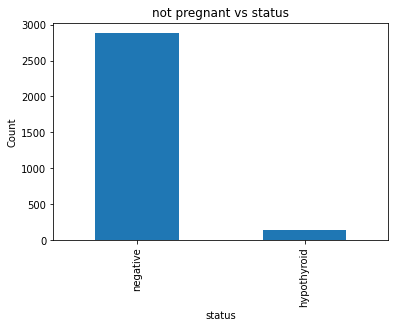

In [24]:
# Plotting the variable status and pregnant into a bar chart
hypo[hypo['pregnant']=='f']['status'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("status")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("not pregnant vs status")

Most non-pregnant people test negative in hypothyroid but the number is quite higher than the pregnant women

## b) Bivariate Analysis

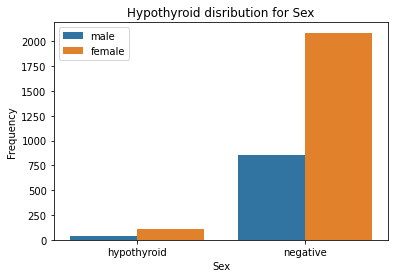

In [25]:
#Bar plot of sex vs status
ax = sns.countplot(x=hypo['status'], hue=hypo['sex'],data=hypo,orient="h", alpha=1)
plt.title('Hypothyroid disribution for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["male", "female"])
plt.ylabel('Frequency')
plt.show()

Most female suffer from hypothyroid compared to male. Also most females have a higher number those who are negative compared to male

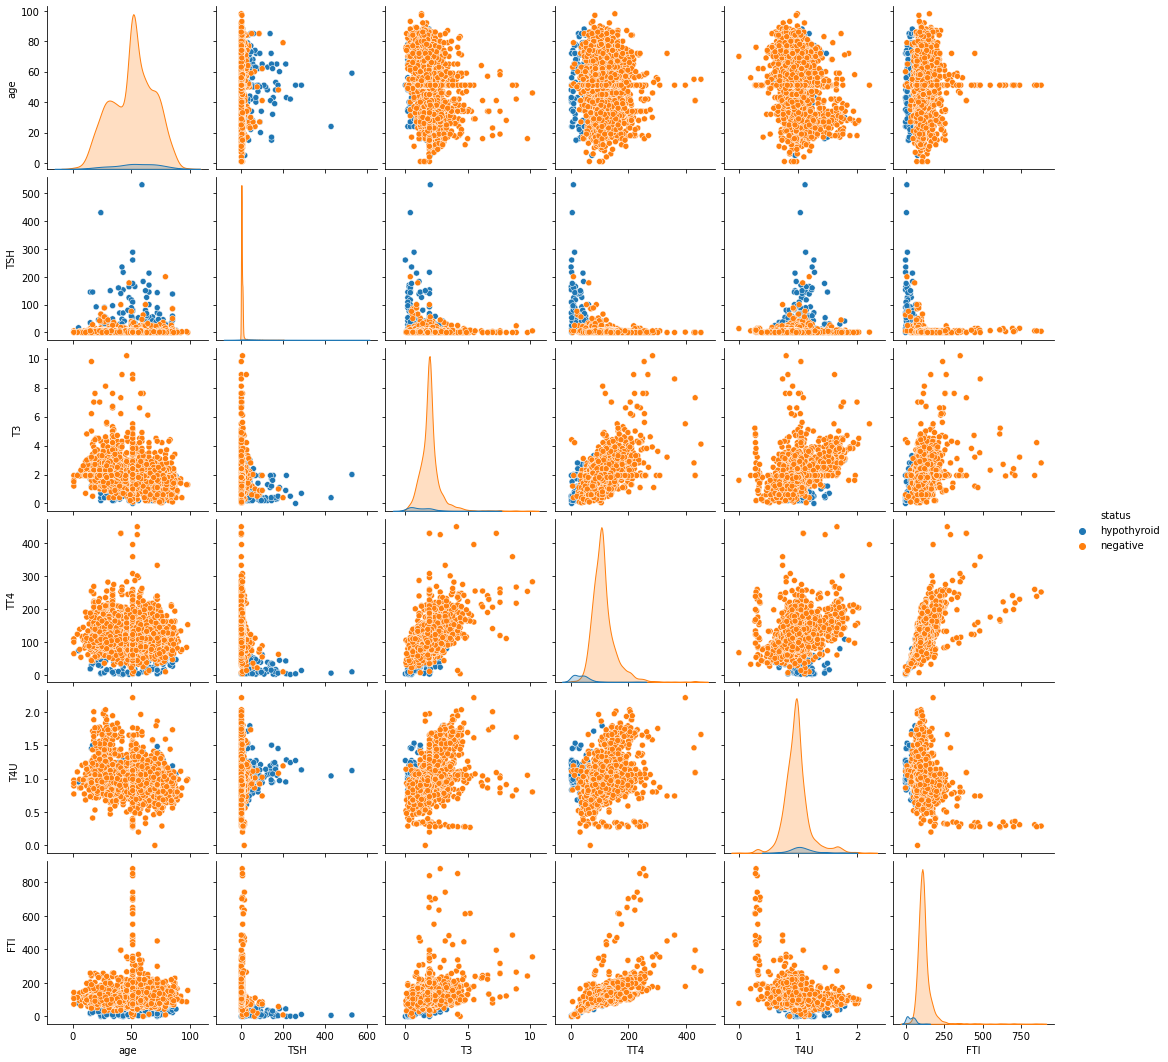

In [26]:
# Use of a pairplot to check for correlation between variables.

var = ['age','TSH','T3','TT4','T4U','FTI']

sns.pairplot(hypo, kind="scatter", diag_kind="kde", vars=var, hue="status")
plt.show()

In [27]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [28]:
cat = ['status',  'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured']

In [29]:
#convert categorical data to numerical using the label encoder technique
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

for i, col_values in enumerate(cat):
  hypo[col_values] = en.fit_transform(hypo[col_values])

In [30]:
hypo.corr()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
status,1.000000,-0.029975,0.013161,0.036975,0.029475,0.012309,-0.045738,-0.048344,0.021865,0.019924,0.021630,0.025074,0.005572,0.003453,-8.661687e-02,-5.862565e-01,-6.765250e-02,1.854079e-01,-6.354115e-02,3.759565e-01,-6.339750e-02,-8.512312e-02,-6.325362e-02,3.115167e-01
age,-0.029975,1.000000,0.008346,0.000451,-0.019781,-0.059541,-0.012432,0.043156,-0.087005,-0.157715,0.063078,-0.063738,-0.021559,-0.036387,2.027883e-01,-7.351709e-03,1.769844e-01,-2.657425e-01,1.268219e-01,-8.631682e-02,1.244764e-01,-1.887859e-01,1.250483e-01,1.773686e-02
sex,0.013161,0.008346,1.000000,-0.118247,0.054353,-0.019527,-0.043106,-0.062156,-0.054076,-0.090688,0.024153,-0.003712,-0.016263,-0.089744,3.387231e-02,-3.484748e-02,9.822571e-02,-7.359567e-02,8.942875e-02,-1.691698e-01,8.882570e-02,-1.981428e-01,9.089841e-02,-7.500181e-02
on_thyroxine,0.036975,0.000451,-0.118247,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,6.955339e-02,-5.256796e-03,-1.616968e-01,2.327889e-02,5.741790e-02,2.172758e-01,5.702951e-02,7.120897e-02,6.009429e-02,1.133502e-01
query_on_thyroxine,0.029475,-0.019781,0.054353,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-1.097744e-01,-1.467587e-02,-8.793145e-02,-1.513294e-02,3.911799e-02,-2.029387e-02,3.902955e-02,-3.474074e-02,3.894098e-02,-4.659149e-03
on_antithyroid_medication,0.012309,-0.059541,-0.019527,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-3.003480e-02,-1.045211e-03,-1.852408e-02,6.562616e-02,-4.943343e-02,-2.744886e-03,-4.967044e-02,2.647929e-02,-4.990861e-02,-1.779705e-02
thyroid_surgery,-0.045738,-0.012432,-0.043106,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,3.656718e-02,1.216671e-02,7.382207e-03,-7.011530e-03,6.806249e-03,-1.612711e-02,6.594007e-03,2.607756e-02,6.380984e-03,-2.610487e-02
query_hypothyroid,-0.048344,0.043156,-0.062156,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,5.047633e-02,6.691075e-02,-2.422225e-02,-3.898383e-02,3.775420e-02,-1.095520e-02,3.747841e-02,4.439329e-02,3.720175e-02,-4.627100e-02
query_hyperthyroid,0.021865,-0.087005,-0.054076,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-1.355999e-01,-2.291001e-02,-3.601245e-02,1.693254e-01,-9.453924e-02,1.310931e-01,-9.506823e-02,7.002441e-02,-9.559973e-02,6.328599e-02
pregnant,0.019924,-0.157715,-0.090688,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,6.525594e-03,-1.241512e-02,3.056135e-02,2.019603e-01,-2.225238e-03,1.712366e-01,-2.401648e-03,3.233287e-01,-2.578747e-03,-5.415269e-03


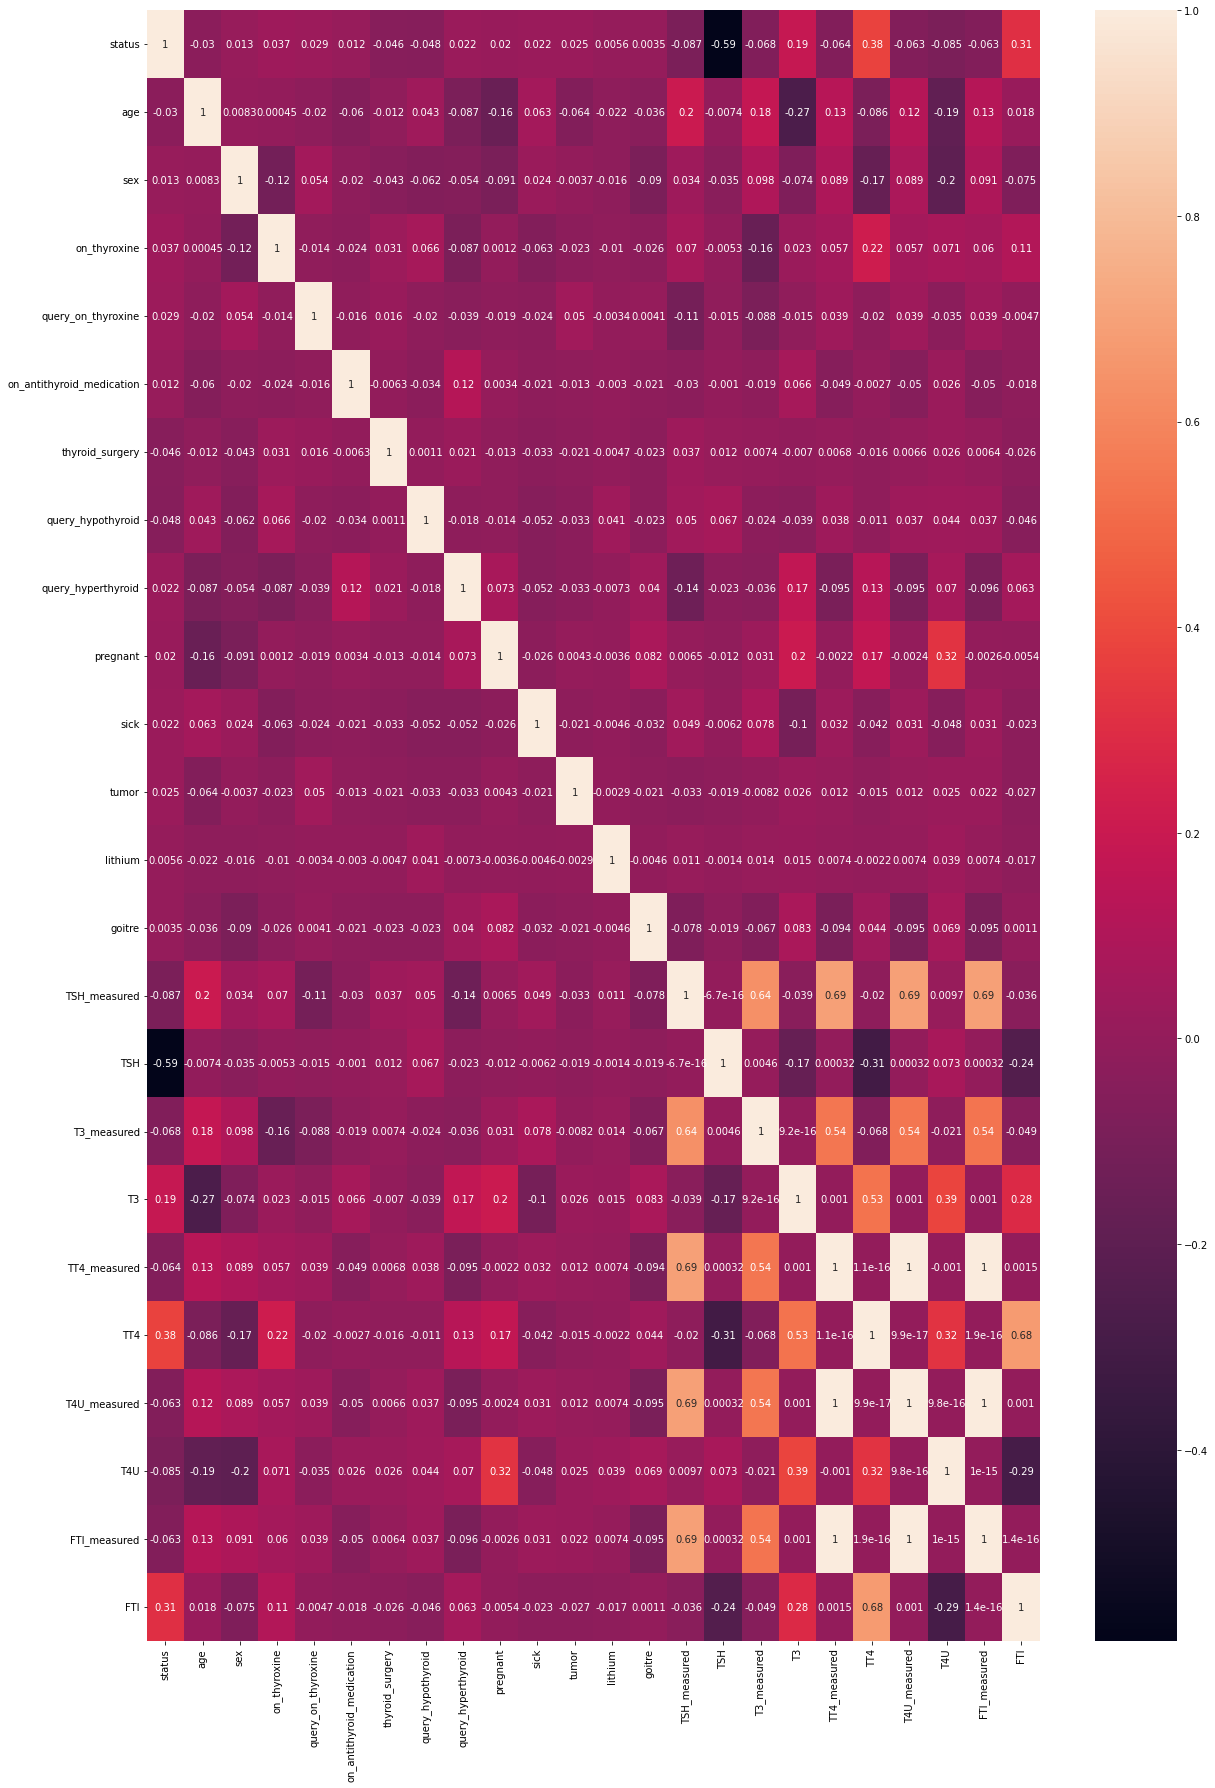

In [31]:
# Plotting correlation using a heatmap
fig,ax = plt.subplots(figsize=(20, 30))
sns.heatmap(hypo.corr(),annot=True)
plt.show()

We have a high correlation between T3 and TT4 hormones

## c) Multivariate Analysis

In [32]:
#Separating features and labels /preprocessing
X = hypo[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']].values
y = hypo["status"].values

In [33]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2468, 23)
(618, 23)
(2468,)
(618,)


In [35]:
#standardizing the variables.
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [36]:
# Implementing PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [37]:
# checking the explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.76113172e-01, 1.06377800e-01, 7.26602327e-02, 5.75089257e-02,
       5.21822606e-02, 4.86900542e-02, 4.55980239e-02, 4.36848741e-02,
       4.27832561e-02, 4.16467876e-02, 4.11338190e-02, 3.90634309e-02,
       3.78092847e-02, 3.63869252e-02, 3.36590224e-02, 3.27814547e-02,
       3.21854610e-02, 2.47706011e-02, 1.80560726e-02, 1.25201966e-02,
       4.05890851e-03, 2.47102472e-04, 8.23334621e-05])

# 6.Implementing the Solution

## Part 1: Random Forest

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = hypo['status'].values
hypo.columns

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = hypo[test_features].values
# importing the random forest regressor
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred = forest.predict(X_test)

In [39]:
# comparison between actual values with predicted values
diff = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
diff.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.977346
std,0.197179,0.148917
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [40]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 4.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


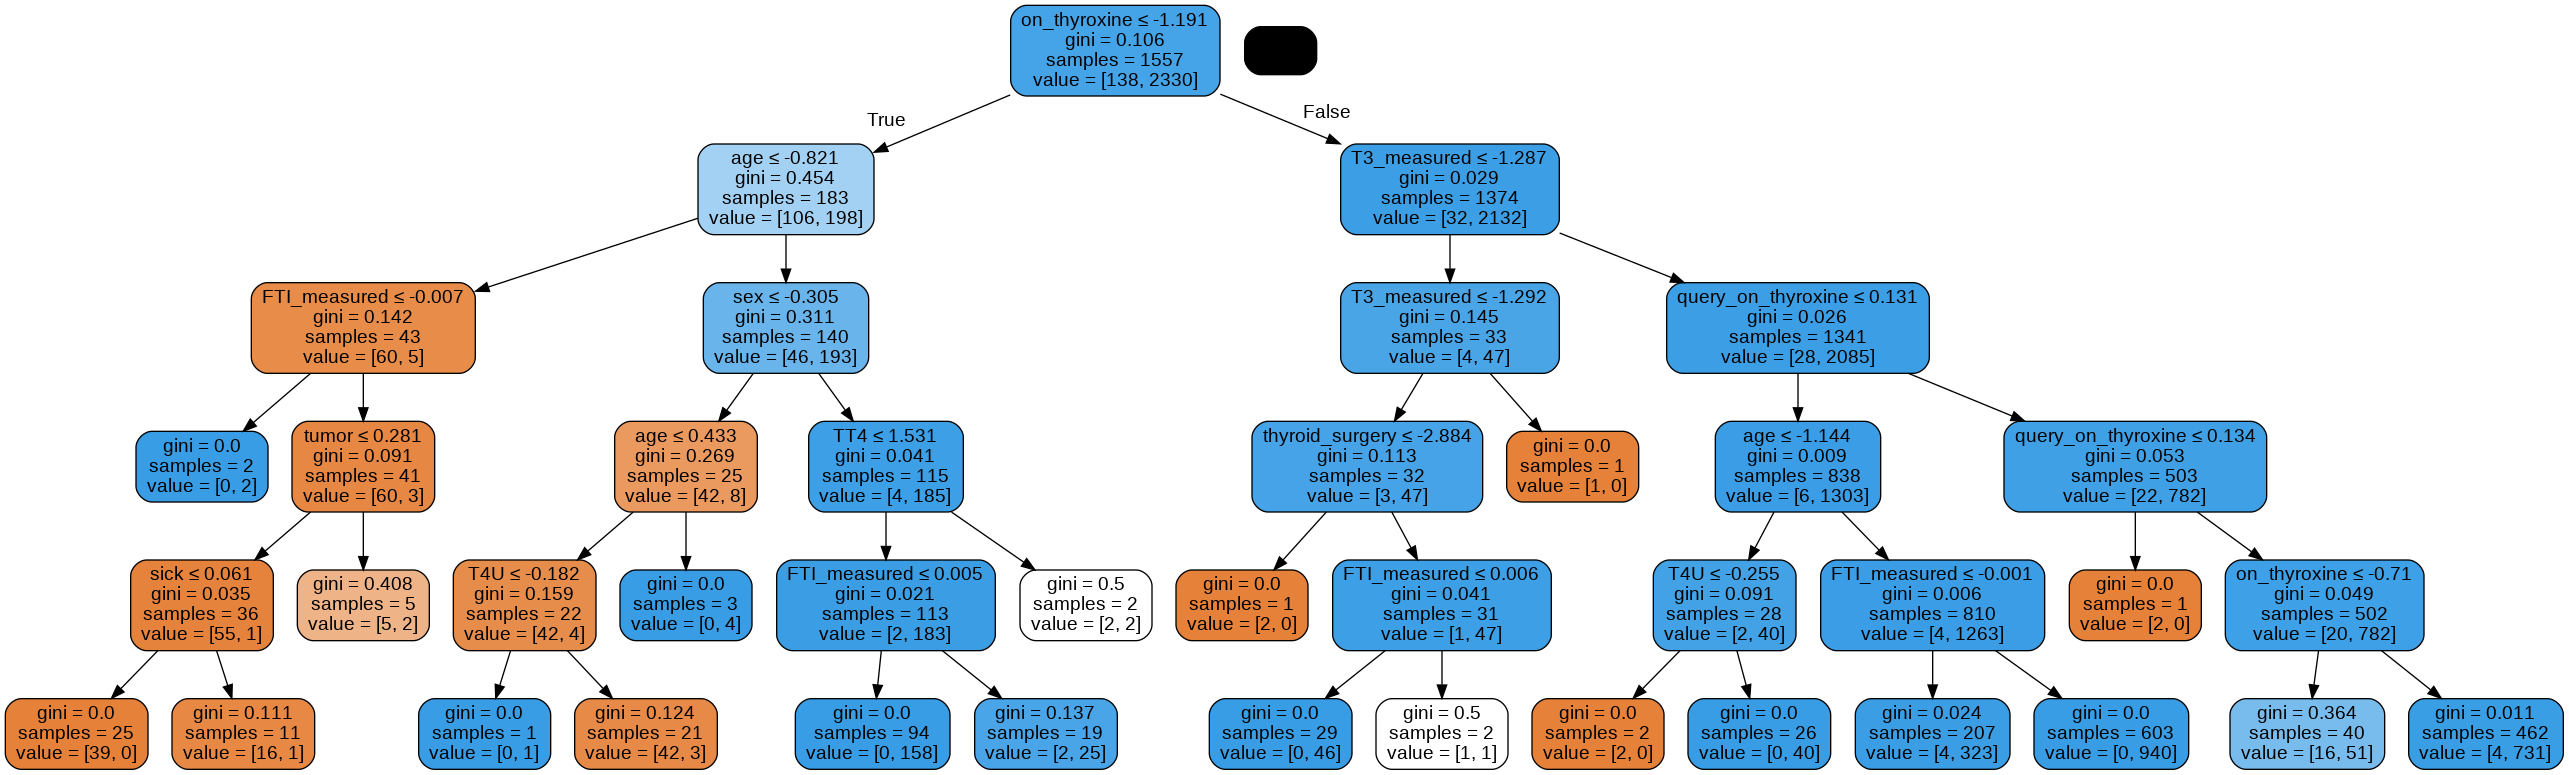

In [41]:
# Visualising the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Visualizing a tree from the random forest
y_pred = forest.predict(X_test)
dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[20]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid disease.png')
Image(graph.create_png())

In [42]:
# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.982200647249191 and the f1 score is 0.9908103592314118


              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.98      1.00      0.99       593

    accuracy                           0.98       618
   macro avg       0.99      0.78      0.85       618
weighted avg       0.98      0.98      0.98       618



array([[ 14,  11],
       [  0, 593]])

In [43]:
# to get the importance levels of our features
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(test_features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('on_thyroxine', 0.33),
 ('age', 0.3),
 ('sex', 0.26),
 ('T4U', 0.03),
 ('query_on_thyroxine', 0.02),
 ('thyroid_surgery', 0.02),
 ('FTI_measured', 0.02),
 ('T3_measured', 0.01),
 ('TT4', 0.01),
 ('on_antithyroid_medication', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0),
 ('pregnant', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('goitre', 0.0),
 ('TSH_measured', 0.0),
 ('TSH', 0.0),
 ('T3', 0.0),
 ('TT4_measured', 0.0),
 ('T4U_measured', 0.0),
 ('FTI', 0.0)]

From the output on_thyroxine has the highest feature importance value

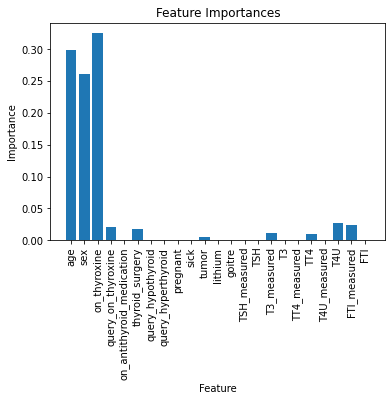

In [44]:
# lets visualize
x_val = list(range(len(importances)))
# Make a bar chart
plt.bar(x_val, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_val, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ad = ada_boost.predict(X_test)


# comparing actual values to predicted values
ada_boost = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred_ad})

# previewing our summary statistics
ada_boost.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.950141
std,0.197179,0.167538
min,0.000000,0.031250
25%,1.000000,0.982073
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [46]:
# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ad)))

The accuracy score is: 0.982200647249191
Root Mean Squared Error: 0.10707710746278216


Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# setting different learning rates, so that we can compare the performance of 
# the classifier's performance at different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    grad = GradientBoostingClassifier(n_estimators = 200, max_depth = 2,
                                     learning_rate = learning_rate,
                                     random_state = 0)
    grad.fit(X_train, y_train)

    print("Learning rate:", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(grad.score(X_train,y_train)))                                                               
    print("Accuracy score (validation): {0:.3f}".format(grad.score(X_test,y_test)))

Learning rate: 0.05
Accuracy score (training): 0.989
Accuracy score (validation): 0.985
Learning rate: 0.075
Accuracy score (training): 0.995
Accuracy score (validation): 0.987
Learning rate: 0.1
Accuracy score (training): 0.999
Accuracy score (validation): 0.989
Learning rate: 0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.985
Learning rate: 0.5
Accuracy score (training): 0.991
Accuracy score (validation): 0.982
Learning rate: 0.75
Accuracy score (training): 0.982
Accuracy score (validation): 0.981
Learning rate: 1
Accuracy score (training): 0.992
Accuracy score (validation): 0.977


We can see that a learning rate of 0.1 gives us the best performance when it comes to validating, and good performance when it comes to training so we will use it as our parameter.

In [48]:
# now to use our selected learning rate to model
gradi = GradientBoostingClassifier(n_estimators = 200, max_depth = 2, 
                                  learning_rate = 0.1, random_state = 0)

# fitting to training data
gradi.fit(X_train, y_train)

# making predictions
gradi_y_pred = gradi.predict(X_test)

# comparing actual values to predicted values
gradi_compare = pd.DataFrame({'Actual' : y_test,'Predicted' : gradi_y_pred})
                        
# previewing our summary statistics
gradi_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.967638
std,0.197179,0.177104
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [49]:
print("R2 score : %.2f" % r2_score(y_test,gradi_y_pred))
print('accuracy_score:',accuracy_score (y_test , gradi_y_pred))

R2 score : 0.71
accuracy_score: 0.988673139158576


In [50]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gradi_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gradi_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gradi_y_pred)))

Mean Absolute Error: 0.011326860841423949
Mean Squared Error: 0.011326860841423949
Root Mean Squared Error: 0.10642772590553623


Gradient boosting has a RMSE of 0.10642772590553623 and accuracy score of 98.87%.It performed slightly better than random forest and ada boost.

## Part 2: SVM:

In [51]:
# Here we will use Randomized search to find the best parameters for the model

# parameter tuning
# Specifying the parameters we want to tune

params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1, 1]}

svc = SVC()

search = RandomizedSearchCV(estimator = svc, 
                      param_distributions = params, 
                      scoring = 'accuracy',
                      n_jobs = 1, 
                      cv = 10 )
                
                
search.fit(X,y)
search.best_params_

{'C': 10, 'gamma': 0.001}

Linear Kernel

In [52]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
# Building the svm model with default parametres.
#
linear_model = SVC(kernel = 'linear',C= 10, gamma= 0.001 )
# Train the model using the training set
#
linear_model.fit(X_train,y_train)
# Predict the response for the test set
linear_y_predi = linear_model.predict(X_test)
linear_y_predi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, linear_y_predi))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, linear_y_predi))

Linear kernel score: 0.988673139158576
Linear kernel confusion matrix:
 [[ 19   6]
 [  1 592]]


In [54]:
print(classification_report(y_test,linear_y_predi))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.99      1.00      0.99       593

    accuracy                           0.99       618
   macro avg       0.97      0.88      0.92       618
weighted avg       0.99      0.99      0.99       618



The avg precision is 0.99

svc linear kernel has an accuracy of 98.87% which is quite good

Polymomial kernel function

In [55]:

# Building the model 
polyclassifier = SVC(kernel='poly',C= 10, gamma= 0.001 )
# Training the model using the training set
polyclassifier=polyclassifier.fit(X_train, y_train)

In [56]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))

0.959546925566343
[[  0  25]
 [  0 593]]


In [57]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.96      1.00      0.98       593

    accuracy                           0.96       618
   macro avg       0.48      0.50      0.49       618
weighted avg       0.92      0.96      0.94       618



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


the avg precision is 0.92

polynomial kernel has 95.95% accuracy meaning the linear kernel performed better.

RBF

In [58]:
# Building the model 
rbfclassifier = SVC(kernel='rbf',C= 10, gamma= 0.001 )
# Training the model using the training set
rbfclassifier=rbfclassifier.fit(X_train, y_train)

In [59]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

0.982200647249191
[[ 17   8]
 [  3 590]]


In [60]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.99      0.99      0.99       593

    accuracy                           0.98       618
   macro avg       0.92      0.84      0.87       618
weighted avg       0.98      0.98      0.98       618



avg precision is 0.98

rbf kernel has a 98.22% accuracy which means the linear kernel still has a better score of 98.87% 

# 8. Challenging the solution

In [61]:
#we'll use a sigmoid function to challenge a solution
# Building the model 
sigclassifier = SVC(kernel='sigmoid',C= 10, gamma= 0.001)
# Training the model using the training set
sigclassifier=sigclassifier.fit(X_train, y_train)

In [62]:
# making prediction
y_pred_sigm = sigclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_sigm))
print(confusion_matrix(y_test, y_pred_sigm))

0.9838187702265372
[[ 17   8]
 [  2 591]]


sigmoid has outperformed the polynomial and the rbf

# Conclusion

From the output of the analysis we can say that all the models performed well since they all had low RMSE and an accuracy score of above 90%. we will go with the  model with best score since we dealing with people. Hence in the part of decision trees we would recommend the Gradient boosting model while in the SVM we go with  linear kernel for best predictions.